# Goal
### Clean and preprocess the collected data to remove errors, handle missing values, and transform it into a suitable format for analysis. 
**Tasks**: data cleaning, data integration, data transformation etc

### *2018 Data* 

In [2]:
import pandas as pd; pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

In [3]:
# convert the start_time and end_time object into datetime64 objects
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [4]:
baywheels_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0
...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0


### Handling missing values

In [5]:
# number of Na values 
baywheels_df.isna().sum().sum()

23562

In [6]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [7]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [8]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0


In [9]:
#identify the NaT values in start_time
na_start_values = baywheels_df['start_time'].isna()
na_start_rows = baywheels_df[na_start_values]

na_start_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [10]:
#identify the NaT values in end_time
na_end_values = baywheels_df['end_time'].isna()
na_end_rows = baywheels_df[na_end_values]

na_end_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [11]:
na_rows = pd.concat([na_start_rows, na_end_rows])

na_rows # the rows with missing values are the same for both columns (10 rows)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [12]:
# check the start_time column
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863731, dtype: datetime64[ns]

In [13]:
# drop the NaT values
baywheels_df.dropna(subset=['start_time'], inplace=True)

In [14]:
# check the start_time column after dropna
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [15]:
# add a column 'duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)


In [16]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45


In [17]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   object         
 3   start_station_lat  object         
 4   start_station_lon  object         
 5   end_station_id     object         
 6   end_station_lat    object         
 7   end_station_lon    object         
 8   bike_id            object         
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), object(7), timedelta64[ns](1)
memory usage: 156.4+ MB


In [18]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:17.797020047


In [19]:
pd.Timedelta(0)


Timedelta('0 days 00:00:00')

In [20]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
223042,2018-11-04 01:48:20,2018-11-04 01:02:58,59.0,37.774814,-122.418954,27.0,37.7880593,-122.3918648,2331.0,-1 days +23:14:38
840962,2018-11-04 01:52:40,2018-11-04 01:02:27,375.0,37.7748362941,-122.4465456605,95.0,37.7662185,-122.4310597,3144.0,-1 days +23:09:47
1129000,2018-11-04 01:51:00,2018-11-04 01:06:56,183.0,37.8087021,-122.2699271,149.0,37.8312752,-122.2856333,417.0,-1 days +23:15:56
1131781,2018-11-04 01:59:54,2018-11-04 01:07:50,67.0,37.7766392,-122.3955263,37.0,37.7849997283,-122.3959356175,1497.0,-1 days +23:07:56
1238539,2018-11-04 01:58:47,2018-11-04 01:01:38,132.0,37.7518194,-122.4266139,134.0,37.7524278,-122.4206278,2487.0,-1 days +23:02:51
1511289,2018-11-04 01:59:01,2018-11-04 01:02:48,41.0,37.78127,-122.41874,61.0,37.7765126,-122.4113061,2136.0,-1 days +23:03:47


In [21]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [22]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [23]:
#check if it worked
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [24]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('0 days 00:01:01')

In [25]:
# show positive duration values
positive_values = baywheels_df[baywheels_df['trip_duration'] > pd.Timedelta(0)]
positive_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0,0 days 00:13:32
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0,0 days 00:10:15
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0,0 days 00:04:59
...,...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0,0 days 00:05:17
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0,0 days 00:11:23
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0,0 days 00:13:57
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0,0 days 00:16:14


In [26]:
#check bike_id for Nan Values
baywheels_df['bike_id'].describe()

count     1863721
unique       5054
top        3961.0
freq         1220
Name: bike_id, dtype: object

In [27]:
#check nan values in bike_id 
nan_bike_id = baywheels_df['bike_id'].isna()
nan_bike_id_rows = baywheels_df[nan_bike_id]
nan_bike_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [28]:
#check nan values in start_station_id
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
401,2018-11-17 13:41:26,2018-11-17 13:44:57,NaN,37.41,-121.95,NaN,37.41,-121.94,4256.0,0 days 00:03:31
532,2018-07-18 21:16:40,2018-07-18 21:20:22,NaN,37.41,-121.95,NaN,37.42,-121.95,4205.0,0 days 00:03:42
674,2018-09-28 09:14:06,2018-09-28 09:23:57,NaN,37.41,-121.96,NaN,37.4,-121.94,4148.0,0 days 00:09:51
825,2018-06-19 19:07:49,2018-06-19 19:50:04,NaN,37.4,-121.93,NaN,37.39,-121.94,4083.0,0 days 00:42:15
941,2018-07-21 09:21:19,2018-07-21 09:30:13,NaN,37.4,-121.94,NaN,37.4,-121.93,4288.0,0 days 00:08:54
...,...,...,...,...,...,...,...,...,...,...
1863397,2018-08-06 19:16:48,2018-08-06 19:22:06,NaN,37.39,-121.93,NaN,37.38,-121.93,4152.0,0 days 00:05:18
1863454,2018-07-16 19:28:52,2018-07-16 19:58:28,NaN,37.41,-121.94,NaN,37.41,-121.95,4117.0,0 days 00:29:36
1863465,2018-07-27 14:48:18,2018-07-27 15:19:20,NaN,37.33,-121.91,NaN,37.35,-121.9,4097.0,0 days 00:31:02
1863492,2018-08-16 19:27:19,2018-08-16 19:42:18,NaN,37.41,-121.96,NaN,37.4,-121.93,4128.0,0 days 00:14:59


In [29]:
#fill in NaN values in start_station_id and end_station_id by comparing the latitude and longitude
from scipy.spatial import cKDTree

def fill_nan_station_ids(df):
    stations = df[['start_station_id', 'start_station_lat', 'start_station_lon']].copy()
    stations.dropna(subset=['start_station_id'], inplace=True)
    station_coords = stations[['start_station_lat', 'start_station_lon']].values
    station_ids = stations['start_station_id'].values
    tree = cKDTree(station_coords)

    nan_start_station_mask = df['start_station_id'].isnull()
    start_station_coords = df.loc[nan_start_station_mask, ['start_station_lat', 'start_station_lon']].values
    _, nearest_station_indices = tree.query(start_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_start_station_mask, 'start_station_id'] = nearest_station_ids

    stations = df[['end_station_id', 'end_station_lat', 'end_station_lon']].copy()
    stations.dropna(subset=['end_station_id'], inplace=True)
    station_coords = stations[['end_station_lat', 'end_station_lon']].values
    station_ids = stations['end_station_id'].values
    tree = cKDTree(station_coords)

    nan_end_station_mask = df['end_station_id'].isnull()
    end_station_coords = df.loc[nan_end_station_mask, ['end_station_lat', 'end_station_lon']].values
    _, nearest_station_indices = tree.query(end_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_end_station_mask, 'end_station_id'] = nearest_station_ids

    return df

# Apply the function to fill NaN station IDs in baywheels_df
baywheels_df = fill_nan_station_ids(baywheels_df)
####disclaimer!####
####this code has been provided by ChatGPT####

In [30]:
#check again if the fill worked
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [31]:
#check again if the fill worked
nan_end_station_id = baywheels_df['end_station_id'].isna()
nan_end_station_id_rows = baywheels_df[nan_end_station_id]
nan_end_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [32]:
#check the row 401 if it still contains the NaN values
row_401 = baywheels_df.iloc[532]
row_401

start_time           2018-07-18 21:16:40
end_time             2018-07-18 21:20:22
start_station_id                   303.0
start_station_lat                  37.41
start_station_lon                -121.95
end_station_id                     303.0
end_station_lat                    37.42
end_station_lon                  -121.95
bike_id                           4205.0
trip_duration            0 days 00:03:42
Name: 532, dtype: object

In [33]:
#check nan values in start_station_lon
nan_start_station_lon = baywheels_df['start_station_lon'].isna()
nan_start_station_lon_rows = baywheels_df[nan_start_station_lon]
nan_start_station_lon_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [34]:
#check nan values in start_station_lat
nan_start_station_lat = baywheels_df['start_station_lat'].isna()
nan_start_station_lat_rows = baywheels_df[nan_start_station_lat]
nan_start_station_lat_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [35]:
#show most and least used stations by looking at number of trips started
baywheels_df['start_station_id'].value_counts()

15.0     38461
67.0     37617
30.0     35092
58.0     34918
81.0     33716
6.0      33390
21.0     32131
3.0      31656
16.0     28367
22.0     26535
5.0      25007
17.0     21883
66.0     21649
90.0     18216
93.0     18150
50.0     17953
27.0     17778
44.0     17664
182.0    16435
23.0     15907
19.0     15611
243.0    14118
134.0    13651
37.0     13453
176.0    12791
126.0    12788
20.0     12678
24.0     12644
70.0     12448
324.0    12410
60.0     12148
28.0     12118
41.0     12089
303.0    12029
43.0     12024
61.0     11727
98.0     11621
14.0     11549
284.0    11490
114.0    11408
49.0     11373
8.0      11322
239.0    11260
89.0     11079
47.0     11074
321.0    11074
36.0     10890
74.0     10795
59.0     10617
163.0    10359
323.0    10106
9.0       9989
11.0      9731
25.0      9694
88.0      9503
121.0     9472
343.0     9306
196.0     9291
109.0     9260
62.0      9209
160.0     9176
80.0      9075
75.0      9001
86.0      8883
197.0     8841
64.0      8771
245.0     

In [36]:
baywheels_df['start_station_id'].describe()

count     1863721
unique        331
top          15.0
freq        38461
Name: start_station_id, dtype: object

In [37]:
baywheels_df['end_station_id'].describe()

count     1863721
unique        331
top          67.0
freq        50000
Name: end_station_id, dtype: object

In [38]:
baywheels_df['end_station_id'].value_counts()

67.0     50000
15.0     44113
30.0     42970
6.0      39222
21.0     35955
58.0     34365
3.0      33086
81.0     32786
16.0     28592
5.0      26002
22.0     23926
66.0     21094
90.0     20427
17.0     20071
44.0     19365
93.0     19213
182.0    18841
27.0     18440
50.0     18168
19.0     16746
23.0     15325
176.0    14411
134.0    13775
36.0     13615
24.0     13151
20.0     12884
126.0    12521
98.0     12471
245.0    12408
14.0     12220
89.0     12164
49.0     12095
8.0      12048
303.0    11988
61.0     11811
114.0    11730
284.0    11500
28.0     11491
60.0     11438
47.0     11387
41.0     11296
321.0    11261
74.0     11118
88.0     10969
43.0     10900
324.0    10805
37.0     10786
11.0     10539
59.0     10415
197.0    10381
239.0    10097
196.0    10032
121.0     9967
70.0      9912
64.0      9813
109.0     9747
223.0     9591
25.0      9548
350.0     9413
160.0     9399
9.0       9266
62.0      9208
323.0     9109
200.0     9018
75.0      8874
112.0     8666
13.0      

In [39]:
#convert values to correct data type
baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 220.9 MB


### checking outliers

In [40]:
outlier_start_lon = baywheels_df.nlargest(10,'start_station_lon')
outlier_start_lon

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:17:03
786068,2018-08-20 09:53:14,2018-08-20 09:54:48,374,45.51,-73.57,374,45.51,-73.57,4425,0 days 00:01:34
1027361,2018-08-21 12:11:52,2018-08-21 12:20:13,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:08:21
1252096,2018-06-29 08:57:14,2018-06-29 09:01:57,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:04:43
1326974,2018-06-11 08:23:37,2018-06-11 08:26:48,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:03:11
1727793,2018-06-22 13:36:13,2018-06-22 14:00:16,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:24:03
1141648,2018-06-01 13:51:52,2018-06-01 13:53:58,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:02:06
1350024,2018-06-01 13:56:04,2018-06-01 13:57:13,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:01:09
1707396,2018-06-01 13:47:53,2018-06-01 13:49:00,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:01:07
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,44.95,-93.22,374,44.95,-93.22,3758,0 days 03:35:45


In [41]:
#checking for outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:17:03
786068,2018-08-20 09:53:14,2018-08-20 09:54:48,374,45.51,-73.57,374,45.51,-73.57,4425,0 days 00:01:34
1027361,2018-08-21 12:11:52,2018-08-21 12:20:13,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:08:21
1252096,2018-06-29 08:57:14,2018-06-29 09:01:57,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:04:43
1326974,2018-06-11 08:23:37,2018-06-11 08:26:48,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:03:11
1727793,2018-06-22 13:36:13,2018-06-22 14:00:16,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:24:03


In [42]:
#show values for rows with station_id = 374
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
83841,2018-09-23 11:47:47,2018-09-23 12:57:27,374,37.26331,-121.833332,374,37.263310,-121.833332,1855,0 days 01:09:40
103362,2018-09-23 12:36:12,2018-09-23 13:10:46,374,37.26331,-121.833332,374,37.263310,-121.833332,406,0 days 00:34:34
150818,2018-09-23 12:50:44,2018-09-23 13:53:28,374,37.26331,-121.833332,294,37.327581,-121.884559,1444,0 days 01:02:44
183596,2018-09-23 13:37:32,2018-09-23 14:50:03,374,37.26331,-121.833332,316,37.330165,-121.885831,2046,0 days 01:12:31
272456,2018-09-23 11:22:52,2018-09-23 11:48:05,374,37.26331,-121.833332,374,37.263310,-121.833332,2434,0 days 00:25:13
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50000,-73.570000,374,45.510000,-73.570000,4425,0 days 00:17:03
446517,2018-09-23 13:01:46,2018-09-23 14:02:34,374,37.26331,-121.833332,374,37.263310,-121.833332,3615,0 days 01:00:48
461663,2018-09-23 13:20:57,2018-09-23 14:16:09,374,37.26331,-121.833332,311,37.333798,-121.886943,1517,0 days 00:55:12
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,44.95000,-93.220000,374,44.950000,-93.220000,3758,0 days 03:35:45
651700,2018-08-13 11:23:24,2018-08-13 12:26:25,374,44.95000,-93.220000,374,44.950000,-93.220000,3763,0 days 01:03:01


In [43]:
#replace faulty values for station  with the correct ones
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lat'] = 37.26331

In [44]:
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lat'] = 37.26331

In [45]:
#check if worked
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
83841,2018-09-23 11:47:47,2018-09-23 12:57:27,374,37.26331,-121.833332,374,37.263310,-121.833332,1855,0 days 01:09:40
103362,2018-09-23 12:36:12,2018-09-23 13:10:46,374,37.26331,-121.833332,374,37.263310,-121.833332,406,0 days 00:34:34
150818,2018-09-23 12:50:44,2018-09-23 13:53:28,374,37.26331,-121.833332,294,37.327581,-121.884559,1444,0 days 01:02:44
183596,2018-09-23 13:37:32,2018-09-23 14:50:03,374,37.26331,-121.833332,316,37.330165,-121.885831,2046,0 days 01:12:31
272456,2018-09-23 11:22:52,2018-09-23 11:48:05,374,37.26331,-121.833332,374,37.263310,-121.833332,2434,0 days 00:25:13
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,37.26331,-121.833332,374,37.263310,-121.833332,4425,0 days 00:17:03
446517,2018-09-23 13:01:46,2018-09-23 14:02:34,374,37.26331,-121.833332,374,37.263310,-121.833332,3615,0 days 01:00:48
461663,2018-09-23 13:20:57,2018-09-23 14:16:09,374,37.26331,-121.833332,311,37.333798,-121.886943,1517,0 days 00:55:12
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,37.26331,-121.833332,374,37.263310,-121.833332,3758,0 days 03:35:45
651700,2018-08-13 11:23:24,2018-08-13 12:26:25,374,37.26331,-121.833332,374,37.263310,-121.833332,3763,0 days 01:03:01


In [46]:
#checking again for other outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

## normal coordinates, outliers checked

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
878586,2018-09-24 03:23:03,2018-09-24 03:29:22,286,37.36,-121.83,286,37.36,-121.83,4257,0 days 00:06:19


### Computing the *idle time* variable

In [47]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# the idle_time is the time since a bike_id=x has been dropped-off at a station until it is again picked-up 
# Compute the idle_time by subtracting the end_time of the previous row from the start_time of the current row for the same bike
baywheels_df['idle_time'] = baywheels_df['start_time'] - baywheels_df['end_time'].shift(1)

# Display the updated DataFrame
baywheels_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44
...,...,...,...,...,...,...,...,...,...,...,...
674466,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38
717325,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45
1090226,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53
1453447,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51


## adding Weekday and Is_Weekend columns

In [48]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekday'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head(20)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1
120145,2018-01-14 13:58:47,2018-01-14 14:09:09,215,37.822547,-122.266318,211,37.827757,-122.256716,11,0 days 00:10:22,0 days 02:01:24,6,1
1519068,2018-01-24 15:25:47,2018-01-24 15:30:25,162,37.800516,-122.272080,163,37.797320,-122.265320,11,0 days 00:04:38,10 days 01:16:38,2,0
163396,2018-01-27 23:24:14,2018-01-27 23:30:04,163,37.797320,-122.265320,200,37.800214,-122.253810,11,0 days 00:05:50,3 days 07:53:49,5,1
276113,2018-01-29 11:07:47,2018-01-29 11:17:22,167,37.848152,-122.252160,212,37.824931,-122.260479,11,0 days 00:09:35,1 days 11:37:43,0,0
491001,2018-01-29 17:54:17,2018-01-29 18:02:17,212,37.824931,-122.260479,182,37.809013,-122.268247,11,0 days 00:08:00,0 days 06:36:55,0,0


## *Weather data*

In [49]:
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head(2)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [50]:
# check what values are in city columns
weather_df_full['city'].describe()

count             76631
unique                1
top       San Francisco
freq              76631
Name: city, dtype: object

In [51]:
weather_df_full['cloud_cover_description'].values

array(['Fair', 'Fair', 'Fair', ..., 'Fair', 'Mostly Cloudy',
       'Mostly Cloudy'], dtype=object)

In [52]:
# we can drop the city column
weather_df_full.drop(labels='city', axis=1, inplace=True)
weather_df_full.head(2)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [53]:
# filter just values from 2018 year
weather_df_full.info()
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.7+ MB


,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
28787,2018-01-01 00:56:00,14.0,28.0,Mostly Cloudy,1018.60,6.0,0.0,14.0
28788,2018-01-01 01:56:00,13.0,27.0,Mostly Cloudy,1018.94,7.0,0.0,13.0
28789,2018-01-01 02:56:00,13.0,27.0,Mostly Cloudy,1019.62,7.0,0.0,13.0
28790,2018-01-01 03:56:00,12.0,27.0,Mostly Cloudy,1019.96,0.0,0.0,12.0
28791,2018-01-01 04:56:00,12.0,27.0,Mostly Cloudy,1020.63,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...
38305,2018-12-30 21:39:00,13.0,28.0,Mostly Cloudy,1019.62,11.0,0.0,13.0
38306,2018-12-30 21:56:00,14.0,28.0,Mostly Cloudy,1019.28,24.0,0.0,14.0
38307,2018-12-30 22:56:00,13.0,28.0,Mostly Cloudy / Windy,1018.94,35.0,0.0,13.0
38308,2018-12-30 23:25:00,13.0,30.0,Partly Cloudy,1018.60,26.0,0.0,13.0


In [54]:
#check missing values in weather_df_18
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9522 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [55]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
29726 2018-02-04 10:56:00         14.0         33.0                    Fair    1018.6        NaN            0.0              14.0


In [56]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,9523.000000,9523.000000,9523.000000,9522.000000,9523.000000,9523.000000
mean,14.365536,29.073716,1016.514507,16.373136,0.054319,14.270818
std,3.678057,4.837957,4.601758,11.116985,0.407368,3.845998
min,2.000000,4.000000,996.940000,0.000000,0.000000,1.000000
25%,12.000000,27.000000,1013.520000,7.000000,0.000000,12.000000
50%,14.000000,29.000000,1016.230000,15.000000,0.000000,14.000000
75%,17.000000,33.000000,1019.280000,24.000000,0.000000,17.000000
max,34.000000,40.000000,1031.470000,59.000000,9.650000,32.000000


In [57]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [58]:
weather_df

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
28787,2018-01-01 00:56:00,14.0,28.0,Mostly Cloudy,1018.60,6.0,0.0,14.0
28788,2018-01-01 01:56:00,13.0,27.0,Mostly Cloudy,1018.94,7.0,0.0,13.0
28789,2018-01-01 02:56:00,13.0,27.0,Mostly Cloudy,1019.62,7.0,0.0,13.0
28790,2018-01-01 03:56:00,12.0,27.0,Mostly Cloudy,1019.96,0.0,0.0,12.0
28791,2018-01-01 04:56:00,12.0,27.0,Mostly Cloudy,1020.63,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...
38305,2018-12-30 21:39:00,13.0,28.0,Mostly Cloudy,1019.62,11.0,0.0,13.0
38306,2018-12-30 21:56:00,14.0,28.0,Mostly Cloudy,1019.28,24.0,0.0,14.0
38307,2018-12-30 22:56:00,13.0,28.0,Mostly Cloudy / Windy,1018.94,35.0,0.0,13.0
38308,2018-12-30 23:25:00,13.0,30.0,Partly Cloudy,1018.60,26.0,0.0,13.0


# summary statistics of baywheels_df

In [59]:
# number of []
fleet_size = len(baywheels_df['bike_id'].unique())
station_size = len(baywheels_df['start_station_id'].unique())
number_of_trips = len(baywheels_df)
print('The baywheels bike fleet consists of {} bikes'.format(fleet_size))
print('The baywheels bike fleet consists of {} stations'.format(station_size))
print('In 2018 there have been made {} trips'.format(number_of_trips))

The baywheels bike fleet consists of 5054 bikes
The baywheels bike fleet consists of 331 stations
In 2018 there have been made 1863721 trips


In [60]:
#trips made sorted by days
trips_per_weekday = baywheels_df.groupby('Weekday').size()
trips_per_weekend = baywheels_df.groupby('Is_Weekday').size()
print(trips_per_weekday)

Weekday
0    294573
1    319332
2    316374
3    314124
4    290390
5    175614
6    153314
dtype: int64


# distance calculations from POIs

In [61]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [62]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))




In [63]:
pois_df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [64]:
#making a new column called geometry
baywheels_geo = gpd.GeoDataFrame(baywheels_df, geometry=gpd.points_from_xy(baywheels_df['start_station_lon'], baywheels_df['start_station_lat']))


In [65]:
test = baywheels_geo.head(2000000)
test

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday,geometry
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1,POINT (-122.28019 37.80982)
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0,POINT (-122.27489 37.80075)
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0,POINT (-122.26825 37.80901)
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1,POINT (-122.26193 37.81938)
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1,POINT (-122.26078 37.81231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674466,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,0,0,POINT (-122.38994 37.77289)
717325,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,0,0,POINT (-122.40490 37.78638)
1090226,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,0,0,POINT (-122.39043 37.78968)
1453447,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0,0,POINT (-122.41165 37.77372)


In [66]:
#test.plot()




In [67]:
pois_df = pois_df.drop('Unnamed: 0', axis=1)
pois_df

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,geometry,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,POINT (-119.67690 37.71580),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.50175 41.82345),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.56817 41.75818),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [68]:
pois_df.dropna(subset=['lat', 'lon'],inplace=True)
pois_df

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,geometry,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.020730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.676900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,POINT (-119.67690 37.71580),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.418990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.501750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.50175 41.82345),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1250367159,0.0,33113436,NaN,41.758180,-121.568170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.56817 41.75818),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [69]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

# bus station POIs

<Axes: >

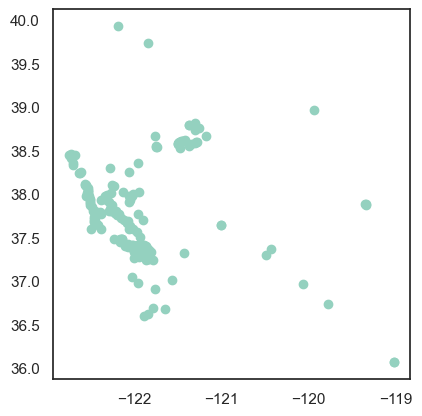

In [70]:
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [72]:
bus_stations["Coordinates"] = list(zip(bus_stations["lat"].round(4),bus_stations["lon"].round(4)))
bus_stations["Coordinates"].tolist()

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[(37.9711, -122.5232),
 (38.5434, -121.7381),
 (37.7793, -122.3902),
 (37.0044, -121.5669),
 (37.444, -122.1663),
 (39.7287, -121.8426),
 (36.5975, -121.8944),
 (36.6758, -121.6564),
 (37.8014, -122.4574),
 (36.9755, -121.9662),
 (37.3946, -122.0771),
 (36.91, -121.7601),
 (37.9055, -122.0684),
 (38.7302, -121.303),
 (38.9577, -119.9421),
 (38.7884, -121.3703),
 (38.7872, -121.3697),
 (38.8078, -121.3055),
 (38.7504, -121.2634),
 (36.684, -121.7942),
 (38.0176, -121.9453),
 (37.8093, -122.2689),
 (38.2428, -122.63),
 (36.6194, -121.8441),
 (37.7729, -122.3897),
 (38.5437, -121.7499),
 (38.5392, -121.7534),
 (37.877, -119.3453),
 (37.8772, -119.3534),
 (37.8775, -119.3457),
 (38.2487, -122.0685),
 (38.3586, -121.965),
 (37.3268, -121.9479),
 (37.4816, -122.1565),
 (37.484, -122.1481),
 (37.4843, -122.1464),
 (37.4805, -122.1693),
 (39.9278, -122.1858),
 (37.3281, -121.8112),
 (38.4386, -122.7138),
 (38.445, -122.7517),
 (38.4135, -122.7332),
 (38.4574, -122.7325),
 (38.4449, -122.6866),

In [73]:
bus_stations.head()

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,geometry,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,Coordinates
154,21,1555983745,0.0,110419188,"{""bus"":""yes"",""network"":""GGT;Marin Transit;SCT;...",37.971140,-122.523160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Rafael Transit Center,NaN,Golden Gate Transit,NaN,NaN,NaN,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.52316 37.97114),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.9711, -122.5232)"
342,3,1639882968,0.0,276828003,"{""bus"":""yes"",""public_transport"":""station""}",38.543410,-121.738110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.73811 38.54341),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(38.5434, -121.7381)"
537,17,1562305953,0.0,301505501,"{""bus"":""yes"",""light_rail"":""yes"",""network"":""Mun...",37.779346,-122.390205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2nd & King,NaN,San Francisco Municipal Railway,NaN,NaN,NaN,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.39020 37.77935),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.7793, -122.3902)"
1217,5,1676243074,0.0,317491915,"{""addr:state"":""CA"",""bus"":""yes"",""network"":""VTA;...",37.004444,-121.566880,Gilroy,NaN,NaN,7150,NaN,95020,NaN,Monterey Street,NaN,Gilroy Transit Center,NaN,Greyhound,NaN,NaN,NaN,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.56688 37.00444),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.0044, -121.5669)"
7119,7,1659122633,0.0,366115191,"{""bus"":""yes"",""network"":""VTA;SamTrans;Marguerit...",37.444000,-122.166320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palo Alto Transit Center,NaN,NaN,NaN,NaN,NaN,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [104]:
center_map = [37.6, -122.1] #center of our coordinates
bus_stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)
positions = list(bus_stations['Coordinates'].unique())
for position in positions:    
    # Create a marker for each station
    marker = folium.Marker(location=position, popup=f'bus station')
    marker.add_to(bus_stations_map)
    
   
    

bus_stations_map

# Displaying the location of stations

In [85]:
#make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df


,start_station_id,start_station_lat,start_station_lon
973541,219,37.809824,-122.280192
761066,202,37.800754,-122.274894
1436517,182,37.809013,-122.268247
979728,178,37.819381,-122.261928
1529805,195,37.812314,-122.260779
120145,215,37.822547,-122.266318
1519068,162,37.800516,-122.272080
163396,163,37.797320,-122.265320
276113,167,37.848152,-122.252160
491001,212,37.824931,-122.260479


In [86]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

In [87]:
#try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df



/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,start_station_id,start_station_lat,start_station_lon,area_label
973541,219,37.809824,-122.280192,0
761066,202,37.800754,-122.274894,0
1436517,182,37.809013,-122.268247,0
979728,178,37.819381,-122.261928,0
1529805,195,37.812314,-122.260779,0
120145,215,37.822547,-122.266318,0
1519068,162,37.800516,-122.272080,0
163396,163,37.797320,-122.265320,0
276113,167,37.848152,-122.252160,0
491001,212,37.824931,-122.260479,0


In [91]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # Create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

stations_map

In [92]:
#add the 'cluster_label' to baywheels_df

baywheels_geo = baywheels_geo.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_geo

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday,geometry,area_label
0,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1,POINT (-122.28019 37.80982),0
1,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0,POINT (-122.27489 37.80075),0
2,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0,POINT (-122.26825 37.80901),0
3,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1,POINT (-122.26193 37.81938),0
4,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1,POINT (-122.26078 37.81231),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,0,0,POINT (-122.38994 37.77289),2
1863717,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,0,0,POINT (-122.40490 37.78638),2
1863718,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,0,0,POINT (-122.39043 37.78968),2
1863719,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0,0,POINT (-122.41165 37.77372),2


In [100]:
## make a seperate dataframe for each area 
san_jose_df = stations_df[stations_df['area_label'] == 1]

san_fran_df = stations_df[stations_df['area_label'] == 2]

oakland_df = stations_df[stations_df['area_label'] == 0]
oakland_df.head()



,start_station_id,start_station_lat,start_station_lon,area_label
973541,219,37.809824,-122.280192,0
761066,202,37.800754,-122.274894,0
1436517,182,37.809013,-122.268247,0
979728,178,37.819381,-122.261928,0
1529805,195,37.812314,-122.260779,0


In [97]:
#san_fran_df.plot()


In [98]:
center_map = [37.737, -122.43] #center of our coordinates
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map



In [99]:
san_jose_df.plot

In [101]:
center_map = [37.300964,-121.882016] #center of our coordinates
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map


In [102]:
center_map = [37.830824, -122.2801920] #center of our coordinates
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map


In [103]:
#display list of all stations in the corresponding areas
oakland_list = oakland_df['start_station_id'].tolist()
san_jose_list = san_jose_df['start_station_id'].tolist()
san_fran_list = san_fran_df['start_station_id'].tolist()
print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1